<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

## Загрузка данных

In [2]:
try:
    data = pd.read_csv('/Users/mikhail/Desktop/praktikum/project_10/insurance.csv')
    
except:
    data = pd.read_csv('/datasets/insurance.csv')

In [3]:
# посмотрим на данные

data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
# изучим типы данных в датафрейме

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
# у нас два столбца в формате float64 
# переведеим их в целочисленные 

data['Возраст'] = data['Возраст'].astype(int)
data['Зарплата'] = data['Зарплата'].astype(int)

In [6]:
# проверим успешность процедуры 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int64
 1   Возраст            5000 non-null   int64
 2   Зарплата           5000 non-null   int64
 3   Члены семьи        5000 non-null   int64
 4   Страховые выплаты  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


In [7]:
# ознакомимся с данными целевого признака

data['Страховые выплаты'].value_counts()

0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

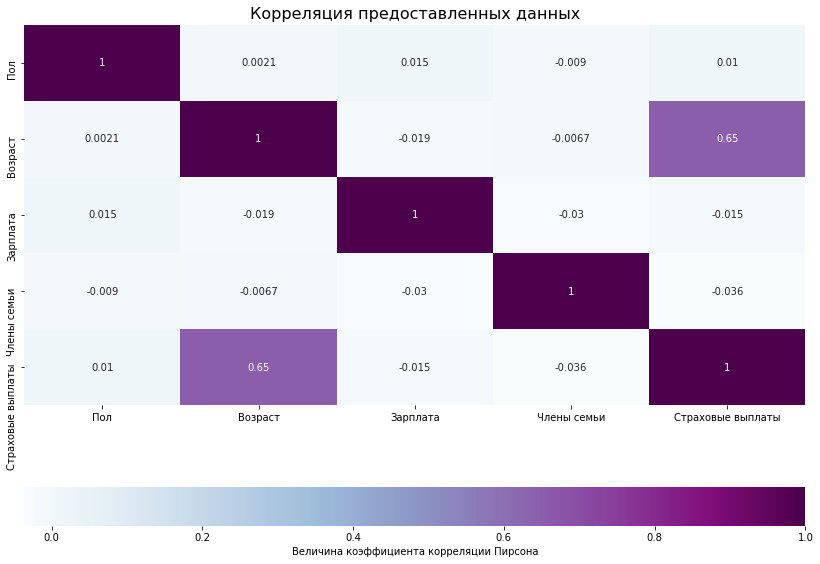

In [8]:
# проверим корреляцию в нашем датафрейме

corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap(corr_matrix, annot=True, 
            cbar_kws={'orientation': 'horizontal', 
                      'label': 'Величина коэффициента корреляции Пирсона'},
            cmap='BuPu')
plt.title('Корреляция предоставленных данных', fontsize=16)
plt.show() 

Заметно выделяется корреляция страховых выплат и возраста. 

Посмотрим люди какого возраста чаще всего получают выплаты.

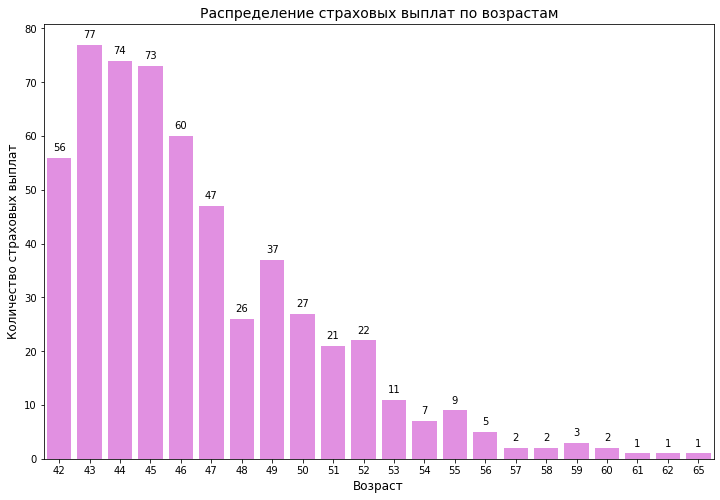

In [9]:
# сгруппируем данные выплат по возрасту
payments_by_age = data[data['Страховые выплаты'] != 0].groupby('Возраст')['Страховые выплаты'] \
.count().sort_values(ascending=False).reset_index()

# построим график распределения страховых выплат по возрасту
plt.figure(figsize=(12, 8))
g=sns.barplot(data=payments_by_age , x='Возраст', y='Страховые выплаты', color='violet')

for p in g.patches:
    g.annotate(str(int(p.get_height())), \
               (p.get_x() + p.get_width() / 2.,\
                p.get_height()), ha='center', va='center', xytext=(0, 10), \
               textcoords='offset points')


plt.title('Распределение страховых выплат по возрастам' , fontsize=14)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество страховых выплат', fontsize=12)
plt.show()

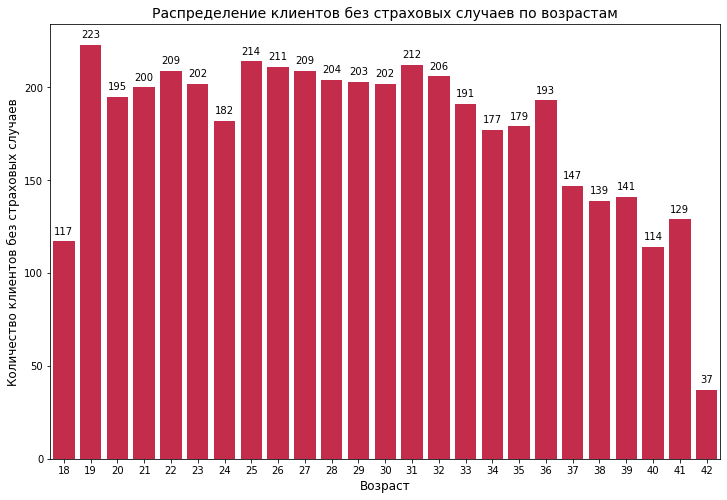

In [10]:
# сгруппируем данные без выплат по возрасту
without_payments_by_age = data[data['Страховые выплаты'] == 0 ].groupby('Возраст')['Страховые выплаты'] \
.count().sort_values(ascending=False).reset_index()

# построим график распределения страховок без выплат по возрасту
plt.figure(figsize=(12, 8))
g=sns.barplot(data=without_payments_by_age , x='Возраст', y='Страховые выплаты', color='crimson')

for p in g.patches:
    g.annotate(str(int(p.get_height())), \
               (p.get_x() + p.get_width() / 2.,\
                p.get_height()), ha='center', va='center', xytext=(0, 10), \
               textcoords='offset points')


plt.title('Распределение клиентов без страховых случаев по возрастам' , fontsize=14)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество клиентов без страховых случаев', fontsize=12)
plt.show()

У нас есть четкое разделение во возрастам - люди до 42 лет не получаеют выплаты, при этом люди после 42 и до 55 получают большую часть выплат. Во-первых - это говорит о том, что данные явно синтетические. А, во-вторых: клиенты в возрасте от 40 до 55 - наиболее затратные.

In [11]:
# изучим распредление выплат по полу

data[data['Страховые выплаты'] != 0].groupby('Пол')['Страховые выплаты'] \
.count().sort_values(ascending=False).reset_index()

,Пол,Страховые выплаты
0,0,284
1,1,280


In [12]:
# изучим распредление клиентов без выплат по полу

data[data['Страховые выплаты'] == 0].groupby('Пол')['Страховые выплаты'] \
.count().sort_values(ascending=False).reset_index()

,Пол,Страховые выплаты
0,0,2221
1,1,2215


Получаем почти полное равенство в обоих случаях. В целом - дальнейшее изучение данных не принесет больше информации и поэтому остановимся на данном шаге

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:**  Качество линейной регрессии не изменится.




**Обоснование:** 

Пусть: 
$$ a = Xw$$ 
$$ a' = X'w'$$ 
Где X' - признаки, умноженные на обратимую квадратную матрицу: 
$$ X' = XP $$
Формула обучения:
$$ w = (X^T X) ^ {-1}  X^T y $$
Значит:
$$ w' = ((XP)^T XP)^{-1} (XP)^T y $$ 

Вспомним основные свойства матриц: 
$$ (A^T)^{-1} = (A^{-1})^T $$
$$ (AB)^T = B^TA^T $$
$$ AA^{-1} = E  $$ 
$$ AE = EA = A $$ 
$$ (AB)^{-1} = B^{-1}A^{-1}$$

Раскроем скобки по свойствам матриц:
$$ w' = P^{-1}((XP)^T X)^{-1}(XP)^T y $$
$$ w' = P^{-1}(P^T X^T X)^{-1} P^T X^T y $$
$$ w' = P^{-1}(X^T X)^{-1}(P^T)^{-1} P^T X^T y $$
$$ w' = P^{-1}(X^T X)^{-1} X^T y $$

Правая часть уравнения ($(X^T X)^{-1} X^T y$) равна w, а значит:

$$ w' = P^{-1}w $$

Следовательно предсказания для новой матрицы равны:

$$ a' = X'P^{-1}w $$ 
$$ a' = XPP^{-1}w $$ 
$$ a' = Xw $$ 


Доказали, что: 
$$ a' = X'w' = Xw = a $$ 

Следовательно - качество линейной регрессии не изменится

## Алгоритм преобразования

**Алгоритм**

Для преобразования данных создадим обратимую матрицу равную по размеру исходной матрице (data). Умножим исходную матрицу на обратимую матрицу - полученная матрица даст тот же результат.

**Обоснование**

В <a href="#Умножение матриц">Пункте 2</a> было доказано, что умножение на признаки не повлияет на линейную регрессию, так как: 
$$a' = X'w' = Xw = a$$ 
Где X' - признаки, умноженные на обратимую матрицу:
$$ X' = XP $$
Линейная регресссия выражены следующим уравнением: 
$$a = Xw + w0$$ 
Следовательно - чтобы изменить результаты линейной регрессии, необходимо менять или вектор весов, или сдвиг.

## Проверка алгоритма

In [13]:
# разобьем наши данные на признаки и целевой признак 

features = data.drop('Страховые выплаты', axis = 1)
target = data['Страховые выплаты']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, \
                                                    random_state=123)

In [14]:
# проверим соответствие размерности

display(X_train.shape)
display(y_train.shape)

(3750, 4)

(3750,)

In [15]:
# построим обратимую квадртаную матрицу размерности 4:4 для преобразования 
matrix = np.random.normal(size = (4,4))

# и проверим ее обратимость путем вычисления определителя 
det = np.linalg.det(matrix)
if det == 0:
    print('Ошибка! Данная матрица не является обратимой!')
else:
    print('Все в порядке. Матрица является обратимой')

Все в порядке. Матрица является обратимой


In [16]:
# обозначим модель, обучим ее и посчитаем метрику R2 на исходных данных

model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
r2_score(target, predictions)

0.42494550308169166

На исходных данных получили метрику R2 равную 0.42494550308169177

In [17]:
#преобразуем признаки через умножение на созданную матрицу

matrix_features = features @ matrix

matrix_features

,0,1,2,3
0,2617.313370,19972.478170,13537.981656,40078.762917
1,1998.226584,15304.431478,10357.709389,30682.010961
2,1102.565166,8458.076025,5720.401276,16950.284369
3,2207.162389,16789.126737,11395.407518,33716.167363
4,1374.031506,10510.825525,7117.274036,21079.869522
...,...,...,...,...
4995,1884.663261,14375.689071,9745.930034,28848.903399
4996,2769.875472,21097.672758,14311.720852,42355.805788
4997,1792.856251,13649.572793,9261.048960,27404.797275
4998,1727.766657,13167.993189,8930.380269,26430.439480


In [18]:
# обучим модель и посчитаем метрику R2 на преобразованных данных
model.fit(matrix_features, target)
predictions = model.predict(matrix_features)
r2_score(target, predictions)

0.4249455030817624

На исходных данных получили метрику R2 равную 0.42494550308179024

## Вывод

В результате всех преобразований мы получили зашифрованные данные, которые не ухудшают работу линейной регрессии и это хорошо видно по резуьтатам вычисления метрики R2 - практически полное равенство.